<a href="https://colab.research.google.com/github/harshitha14-cyber/MLProject/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd

In [53]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign (1).csv to marketing_campaign (1) (3).csv


In [54]:
dataset = pd.read_csv("marketing_campaign (1).csv" , sep="\t")
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [55]:
dataset = dataset.drop(columns=[
    'ID',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'Z_CostContact',
    'Z_Revenue',
    'Complain',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'AcceptedCmp1',
    'AcceptedCmp2'
])


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [57]:
from datetime import datetime

current_year = datetime.now().year
dataset['Age'] = current_year - dataset['Year_Birth']

dataset.drop('Year_Birth', axis=1, inplace=True)
dataset.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1,69
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,72
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,61
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,42
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,45


In [58]:
dataset.isnull().sum()

,0
Education,0
Marital_Status,0
Income,24
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [59]:
dataset['Income'].fillna(dataset['Income'].median(), inplace=True)

/tmp/ipython-input-984073219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Income'].fillna(dataset['Income'].median(), inplace=True)


In [71]:
dataset['Total_Spending'] = (
    dataset['MntWines'] +
    dataset['MntFruits'] +
    dataset['MntMeatProducts'] +
    dataset['MntFishProducts'] +
    dataset['MntSweetProducts'] +
    dataset['MntGoldProds']
)
dataset = dataset.drop(columns=[
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
])
dataset.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Total_Spending
0,Graduation,Single,58138.0,58,3,8,10,4,7,1,69,1617
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,72,27
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,61,776
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,42,53
4,PhD,Married,58293.0,94,5,5,3,6,5,0,45,422


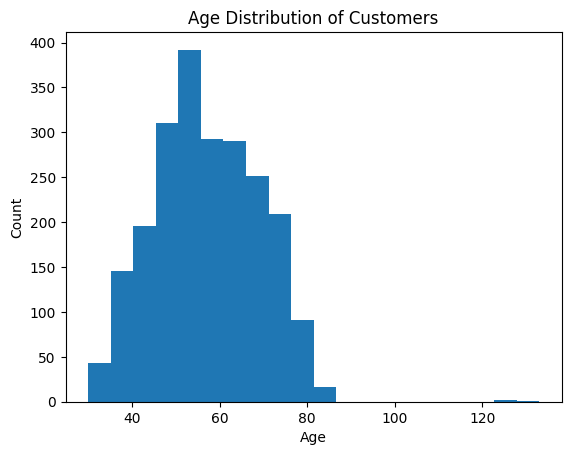

In [72]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(dataset['Age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Customers")
plt.show()

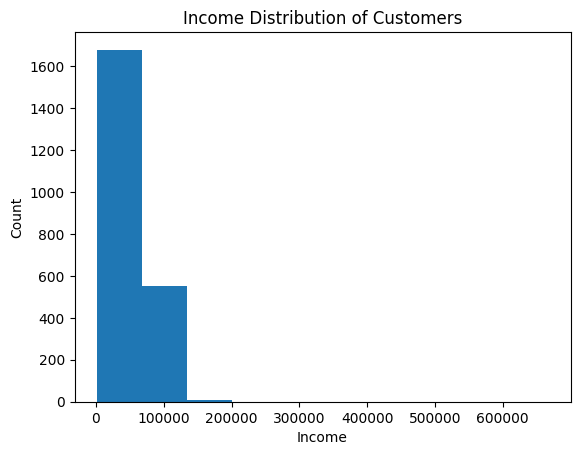

In [73]:
plt.figure()
plt.hist(dataset['Income'], bins=10)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income Distribution of Customers")
plt.show()

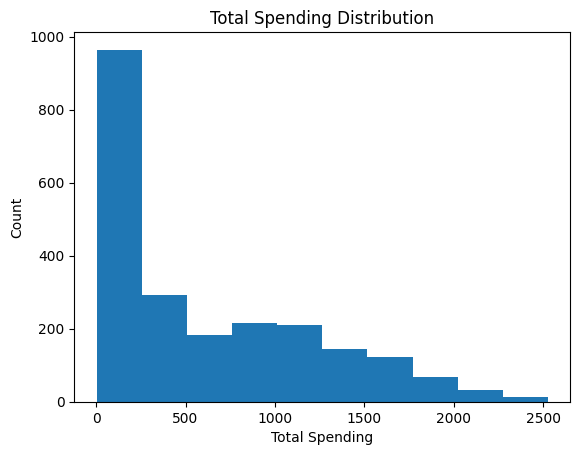

In [74]:
plt.figure()
plt.hist(dataset['Total_Spending'], bins=10)
plt.xlabel("Total Spending")
plt.ylabel("Count")
plt.title("Total Spending Distribution")
plt.show()

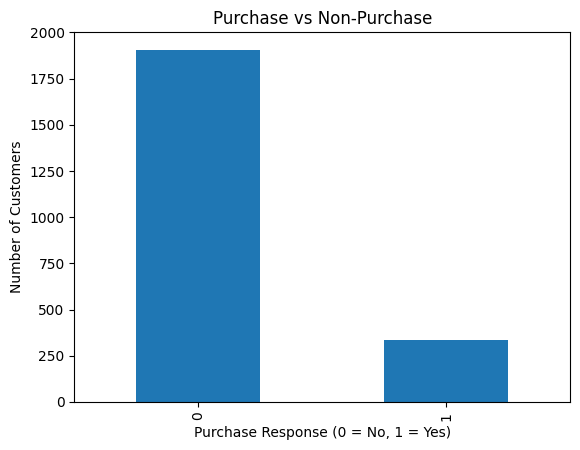

In [75]:
plt.figure()
dataset['Response'].value_counts().plot(kind='bar')
plt.xlabel("Purchase Response (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.title("Purchase vs Non-Purchase")
plt.show()

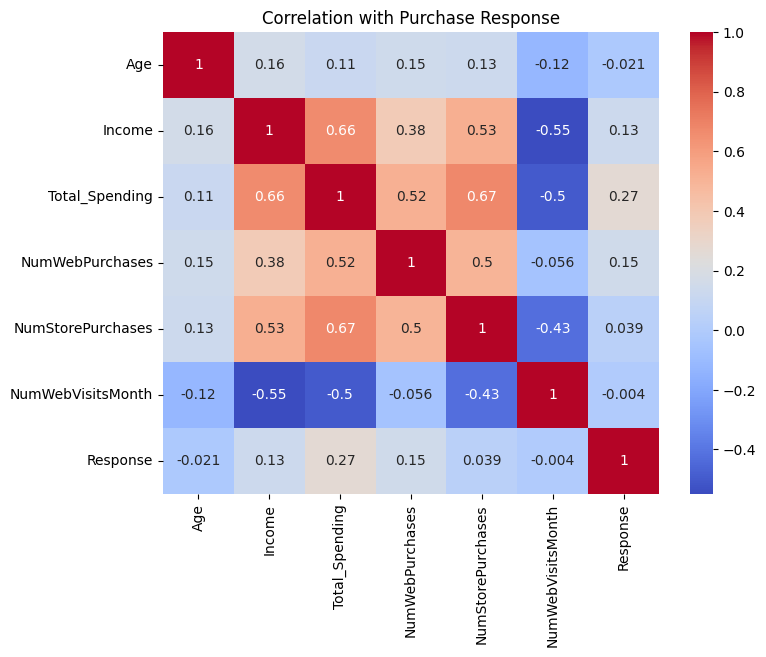

In [77]:
import seaborn as sns

selected_cols = [
    'Age',
    'Income',
    'Total_Spending',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Response'
]

plt.figure(figsize=(8,6))
sns.heatmap(dataset[selected_cols].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation with Purchase Response")
plt.show()


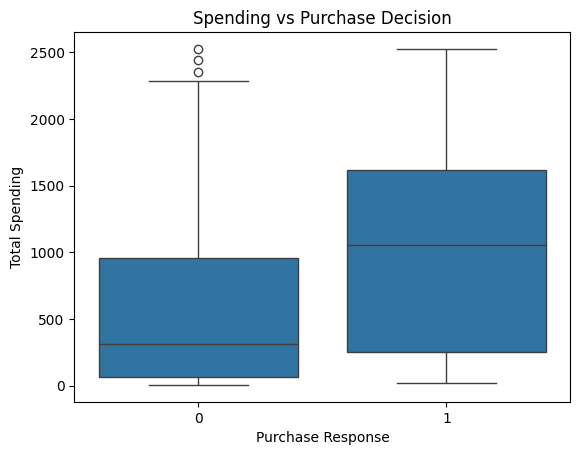

In [79]:
plt.figure()
sns.boxplot(x='Response', y='Total_Spending', data=dataset)
plt.xlabel("Purchase Response")
plt.ylabel("Total Spending")
plt.title("Spending vs Purchase Decision")
plt.show()

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['Education'] = le.fit_transform(dataset['Education'])
dataset['Marital_Status'] = le.fit_transform(dataset['Marital_Status'])

In [83]:
X = dataset.drop('Response', axis=1)
y = dataset['Response']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Logistic Regression Results")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1-Score :", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results
Accuracy : 0.8660714285714286
Precision: 0.64
Recall   : 0.23880597014925373
F1-Score : 0.34782608695652173
Confusion Matrix:
 [[372   9]
 [ 51  16]]


In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-Score :", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Results
Accuracy : 0.8816964285714286
Precision: 0.7916666666666666
Recall   : 0.2835820895522388
F1-Score : 0.4175824175824176
Confusion Matrix:
 [[376   5]
 [ 48  19]]


In [87]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ]
})

comparison

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.866071,0.640000,0.238806,0.347826
1,Random Forest,0.881696,0.791667,0.283582,0.417582


**Random Forest Classifier is the best model for this dataset:**

1) Higher accuracy and F1-score than Logistic Regression.

2) Captures non-linear patterns

## **Final Model Comparition Summary:**

**Logistic Regression**: Simple and interpretable baseline model. Gives reasonable accuracy but struggles to identify true purchasers (low recall).

**Random Forest**: Captures complex patterns in spending and engagement. Higher accuracy, precision, and F1-score indicate better prediction of actual purchasers.

## **Project Insights:**

**Demographics influence purchase behavior**

Older customers and those with higher income tend to purchase more.Marital status and education have minor effects.

**Spending & purchase behavior are strong predictors**

Total spending and previous purchase counts are highly correlated with purchase response.Customers who spend more across product categories are more likely to respond to marketing campaigns.